# Part 1: The Sampling Theorem and its Implications


## What is a signal?

A signal can be thought of as any measurement that varies over some dimension. Signals can be continuous (analog) or discrete (digital). They may or may not contain any obvious information, but it is their ability to carry meaningful information that interests us.

Lets take a look at a simple signal:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

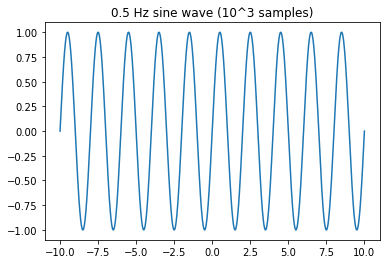

In [5]:
f = 1/2
n_samples = 1000

x = np.linspace(-10, 10, n_samples)
y = np.sin(x*f*(2*np.pi))

plt.plot(x,y)
plt.title('0.5 Hz sine wave (10^3 samples)');

Here we have created a sine wave with a frequency of 0.5 Hz. `np.linspace` was used to create the x coordinates (1000 values, spaced evenly from -10 to 10, inclusive). The y coordinates are thus based on the $sin$ function. The plot looks smooth, mainly because we have many samples used to draw the curve.


Lets take a look at what happens if we reduce the number of samples in our sine wave:

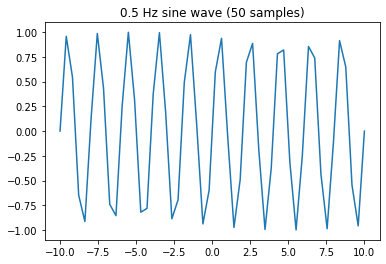

In [6]:
f = 1/2
n_samples = 50

x = np.linspace(-10, 10, n_samples)
y = np.sin(x*f*(2*np.pi))

plt.plot(x,y)
plt.title('0.5 Hz sine wave (50 samples)');

This looks a bit jagged, but it is still clear that this is a wave-like signal with a frequency of 0.5 Hz. We will revisit the sampling rate, but for now the important thing to understand that this is a signal that carries some information. In this case, the information is a frequency (0.5 Hz).

Not everything that looks like a signal necessarily carries information:

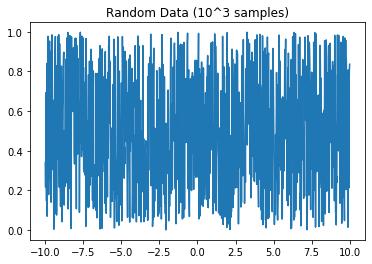

In [7]:
from numpy.random import random

n_samples = 1000
x = np.linspace(-10, 10, n_samples)

y = random(n_samples)

plt.plot(x,y)
plt.title('Random Data (10^3 samples)');

Since this example contains random data, some might say that this is not a true signal, as it is not carrying information. Actually, there is some information here about the structure of the "noise" (e.g., values appear to have upper and lower bounds, follow a uniform distribution, etc.). Regardless, we could use signal processing techniques to inspect these data.

Importantly, real-world measurements tend to contain "real" signal components and "noise" components:

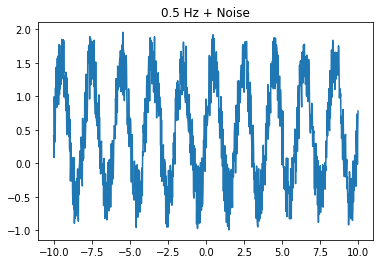

In [8]:
f = 1/2
n_samples = 1000

x = np.linspace(-10, 10, n_samples)
y = np.sin(x*f*(2*np.pi))
noise = random(n_samples) # make noise
y = y + noise # add noise

plt.plot(x,y)
plt.title('0.5 Hz + Noise');

Since the noise level is not terribly high compared to the "real" signal, it is still pretty easy to see the information (0.5 Hz) carried by this measurement.

When noise levels are higher, this becomes a much more difficult task:

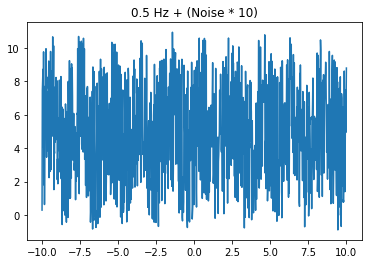

In [9]:
f = 1/2
n_samples = 1000
noise_level = 10

x = np.linspace(-10, 10, n_samples)
y = np.sin(x*f*(2*np.pi))
noise = random(n_samples) * noise_level
y = y + noise

plt.plot(x,y)
plt.title('0.5 Hz + (Noise * 10)');

Most signals we want to analyze are much more complex than simple sine waves:

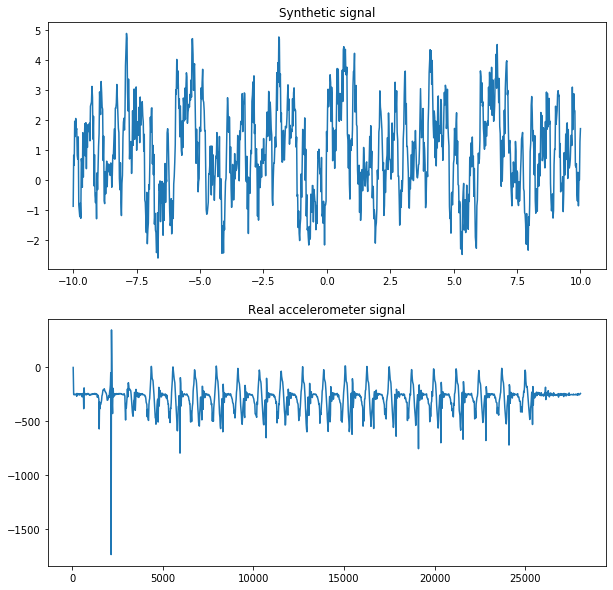

In [37]:
import pandas as pd

# synthetic "real" signal
f = [1/2, 1/3, 2, 3]
n_samples = 1000
noise_level = 2
x = np.linspace(-10, 10, n_samples)
y = [np.sin(x*freq*(2*np.pi)) for freq in f] # create signal for each frequency
y = np.array(y).sum(axis=0) # sum up all frequencies
noise = random(n_samples) * noise_level
y = y + noise

# real signal from accelerometer
walk = pd.read_csv('../data/walk1.csv', header = None)
walk.columns = ['x', 'y', 'z', 't']


# plot
fig, ax = plt.subplots(2, figsize=(10,10))
ax[0].set_title('Synthetic signal')
ax[0].plot(x, y)
ax[1].set_title('Real accelerometer signal')
ax[1].plot(walk.t, walk.x);



Looking at these plots, you can start to appreciate how it can be difficult to separate signal from noise. And even if you know what the real signal is, how do you start to make sense of it? These are the primary concerns of signal processing.

## Aliasing

In the first example above, we saw how sampling rate can affect the appearance of a signal. At a ~50 Hz sampling rate, our 0.5 Hz signal looked smooth. At a ~2.5 Hz sampling rate, the signal looked jagged, but we were still able to see it.

Lets take a look at what happens when we sample at the same rate as the signal:

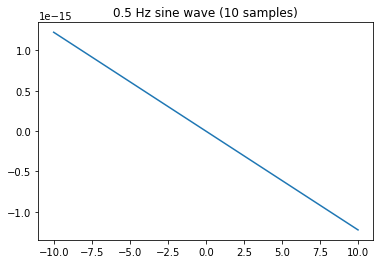

In [55]:
f = 1/2
n_samples = 11 # 0.5 Hz sampling plus endpoint

x = np.linspace(-10, 10, n_samples)
y = np.sin(x*f*(2*np.pi))

plt.plot(x,y)
plt.title('0.5 Hz sine wave (10 samples)');

This doesn't look like a sine wave at all! In fact, we have apparently lost our signal. Lets take a look at some sampling rates near the frequency of the signal:

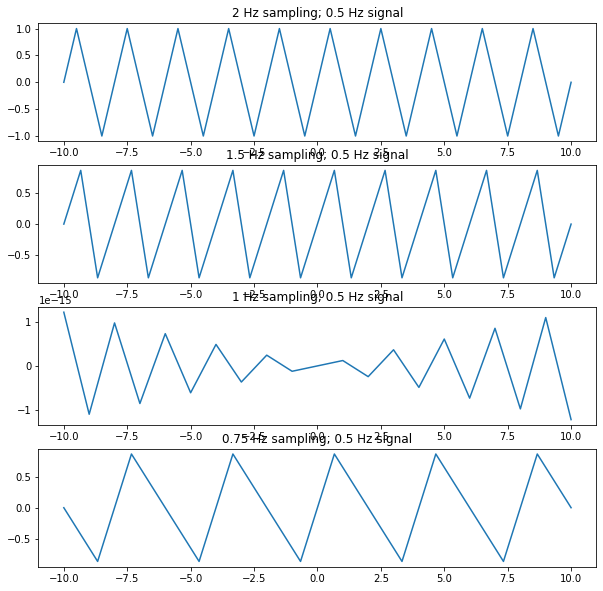

In [69]:
f = 1/2
n_samples = [41, 31, 21, 16]
rates = ['2 Hz', '1.5 Hz', '1 Hz', '0.75 Hz']

x = [np.linspace(-10, 10, n) for n in n_samples]
y = [np.sin(sig*f*(2*np.pi)) for sig in x]

fig, ax = plt.subplots(len(n_samples), figsize=(10,10))
for i in range(len(n_samples)):
    ax[i].set_title(rates[i] + " sampling; 0.5 Hz signal")
    ax[i].plot(x[i], y[i])

In [68]:
30/20

1.5